In [1]:
import property_inference_interface
interface = property_inference_interface.PropertyInferenceInterface()

meta_params = {
    'num_of_LPs': 4,
    'size_of_train_set': 10000,
    'size_of_test_set': 100,
    'flatten': False, 
    'model_type': 'CNN',
    'adv_attack': 'i_FGSM'
}

interface.set_meta_params(meta_params)
interface.print_meta_params()

num_of_LPs           : 4
size_of_train_set    : 10000
size_of_test_set     : 100
flatten              : False
model_type           : CNN
adv_attack           : i_FGSM


In [2]:
interface.prepare_dataset()
interface.print_dataset_shape()

Train dataset
(10000, 1, 28, 28) (10000,)
Test dataset
(100, 1, 28, 28) (100,)


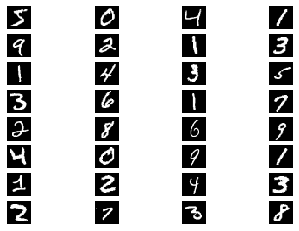

In [3]:
# Visualize the dataset
%matplotlib inline
interface.print_some_samples()

In [4]:
# interface.generate_model(num_of_epochs=15)
interface.load_model('MNIST_CNN.pt')
interface.eval_model('train')
interface.eval_model('test')
# interface.store_model('MNIST_CNN.pt')

//anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
//anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Model ( train ) accurancy: 0.9847
Model ( test ) accurancy: 0.98


0.98

In [5]:
print('Display the architecture')
interface.model

Display the architecture


CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [6]:
interface.generate_LPs()
interface.print_LPs()
model = interface.model

LPs shape of 1 th class: (4,)
(1001, 9216)
(1001, 1600)
(1001, 288)
(1001, 64)
LPs shape of 2 th class: (4,)
(1127, 9216)
(1127, 1600)
(1127, 288)
(1127, 64)
LPs shape of 3 th class: (4,)
(991, 9216)
(991, 1600)
(991, 288)
(991, 64)
LPs shape of 4 th class: (4,)
(1032, 9216)
(1032, 1600)
(1032, 288)
(1032, 64)
LPs shape of 5 th class: (4,)
(980, 9216)
(980, 1600)
(980, 288)
(980, 64)
LPs shape of 6 th class: (4,)
(863, 9216)
(863, 1600)
(863, 288)
(863, 64)
LPs shape of 7 th class: (4,)
(1014, 9216)
(1014, 1600)
(1014, 288)
(1014, 64)
LPs shape of 8 th class: (4,)
(1070, 9216)
(1070, 1600)
(1070, 288)
(1070, 64)
LPs shape of 9 th class: (4,)
(944, 9216)
(944, 1600)
(944, 288)
(944, 64)
LPs shape of 10 th class: (4,)
(978, 9216)
(978, 1600)
(978, 288)
(978, 64)


In [7]:
# alphas = [.5, .4, .3, .2, 1e-1, 1e-2, 1e-3, 1e-4, 8e-5, 5e-5, 2e-5, 1e-5, 5e-6, 1e-6, 5e-7, 1e-7, 7e-8, 5e-8, 2e-8, 1e-8, 5e-9, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16]
alphas = [1e-4]
for alpha in alphas:
    (B_detect_ratio, A_detect_ratio), (B_LPs, A_LPs), (B_LPs_score, A_LPs_score) = interface.evaluate_algorithm_on_test_set(alpha, verbose=True)
    exp_info = [B_detect_ratio, A_detect_ratio]
    print(alpha, exp_info)

Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Benign input matching...
['benign', 'benign', 'benign', 'adversa

Using TensorFlow backend.


Adversarial input matching...
['adversarial', 'adversarial', 'benign', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['benign', 'adversarial', 'benign', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'adversarial', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'benign', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'benign', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'benign', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['adv

['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['benign', 'benign', 'benign', 'adversarial'] benign
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['benign', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'benign', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Adversarial input matching...
['adversarial', 'benign', 'adversarial', 'adversarial'] adversarial
Evaluate on adversarial samples with test set
89 94 0.9468085106382979
0.0001 [0.9897959183673469, 0.9468085106382979]


(98, 4) (94, 4)
[0.         0.         0.01020408 1.        ]
[0.89361702 0.20212766 0.4787234  1.        ]
(98, 4) (94, 4)


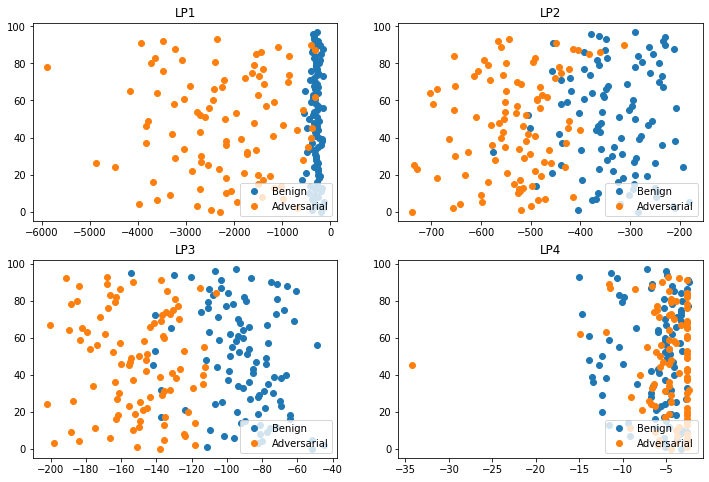

In [8]:
import numpy as np

BLPs, ALPs = np.array(B_LPs), np.array(A_LPs)
print(BLPs.shape, ALPs.shape)

BLPs[BLPs=='benign'] = 1
BLPs[BLPs=='adversarial'] = 0
BLPs = BLPs.astype(np.int)
prob_BLPs = np.sum(BLPs, axis=0) / BLPs.shape[0]

ALPs[ALPs=='benign'] = 1
ALPs[ALPs=='adversarial'] = 0
ALPs = ALPs.astype(np.int)
prob_ALPs = np.sum(ALPs, axis=0) / ALPs.shape[0]


print(1 - prob_BLPs)
print(1 - prob_ALPs)

BLPs_score, ALPs_score = np.array(B_LPs_score), np.array(A_LPs_score)
print(BLPs.shape, ALPs.shape)

%matplotlib inline        
import matplotlib.pyplot as plt

# LPs_score = BLPs_score
# for i in range(LPs_score.shape[1]):
#     LP_score = LPs_score[:,i]
#     plt.plot(LP_score, np.arange(LP_score.shape[0]), 'o')

# plt.legend(['LP1', 'LP2', 'LP3', 'LP4'])
# plt.xlim(-50, 800)
# plt.show()

# LPs_score = ALPs_score
# for i in range(LPs_score.shape[1]):
#     LP_score = LPs_score[:,i]
#     plt.plot(LP_score, np.arange(LP_score.shape[0]), 'o')

# plt.legend(['LP1', 'LP2', 'LP3', 'LP4'])
# plt.xlim(-50, 800)
# plt.show()
        
fig, _ = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i in range(BLPs_score.shape[1]):
    plt.subplot(2, 2, (i+1))
    BLP_score, ALP_score = BLPs_score[:,i], ALPs_score[:,i]
    plt.plot(BLP_score, np.arange(BLP_score.shape[0]), 'o')
    plt.plot(ALP_score, np.arange(ALP_score.shape[0]), 'o')
    plt.legend(['Benign', 'Adversarial'], loc="lower right")
    plt.title('LP'+str(i+1))
    
# plt.savefig('exp6_09.png')
plt.show()

In [9]:
def single_exp():
    interface.generate_model(num_of_epochs=5)
    interface.generate_LPs()
    (benign_detect_ratio, adversarial_detect_ratio), (benign_LPs, adversarial_LPs) = interface.evaluate_algorithm_on_test_set(alpha, verbose=False)
    exp_info = [benign_detect_ratio, adversarial_detect_ratio]
    return exp_info    

def exp(num_of_trails, file_name):
    cumulative_exp_info = []
    
    import csv 
    for i in range(num_of_trails):
        print('trail', (i+1))
        single_exp_info = single_exp()
        cumulative_exp_info.append(single_exp_info)

        with open(file_name, mode='a', newline='') as file:
            writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(single_exp_info)
        file.close()

        print(single_exp_info)
        
    return cumulative_exp_info

file_name = 'test.csv'
# cumulative_exp_info = exp(40, file_name)

In [10]:
print('all pass')

all pass
